<span style="font-size: 150%;color:white;background:#38761d"> A task for the recruitment process

<span style="font-size: 150%;color:white;background:red">Wojciech Moszczyński



<span style="font-size: 300%;color:white;background:#38761d">neural network   
    
    from:
https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly.


<span style="font-size: 150%;color:#0c343d;background:#fff2cc"> For the first 10 products, please conduct the exploratory analysis and compute the forecast for the next 7 weeks.  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import torch

import warnings 
warnings.filterwarnings("ignore")

device = torch.device('cuda') 

from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE339927/1A/dane7.csv')    
print(df.dtypes)
df.head(4)

Unnamed: 0                int64
Timestamp                object
Value                     int64
do100                     int64
kon                     float64
val_diff                float64
ZNAK                      int64
zeK                       int64
do100Plus                 int64
prognoza                float64
Prognoza_skorygowana    float64
dtype: object


,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN
3,3,2020-05-01 00:00:03,0,3,NaN,NaN,1,0,3,100.0,100.0


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:

df['hour']= df['Timestamp'].dt.hour.astype(np.float32)
df['minute']= df['Timestamp'].dt.minute.astype(np.float32)
df['second']= df['Timestamp'].dt.second.astype(np.float32)
df.head(3)

,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN,0.0,0.0,0.0
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN,0.0,0.0,1.0
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN,0.0,0.0,2.0


In [5]:
df = df.dropna(how='any')

In [6]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Value', 'do100', 'kon', 'val_diff', 'ZNAK',
       'zeK', 'do100Plus', 'prognoza', 'Prognoza_skorygowana', 'hour',
       'minute', 'second'],
      dtype='object')

In [7]:
df.shape

(4347, 14)

max: 100
min: 0


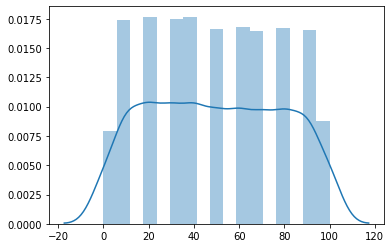

In [8]:
print('max:',df['Value'].max())
print('min:',df['Value'].min())

sns.distplot(np.array(df['Value']))

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">The population 

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Then we 

<span style="font-size: 210%;color:#0c343d;background:#fff2cc"> We create 
    
<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Now I creat

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [9]:
x = df[['do100', 'kon', 'val_diff', 'ZNAK','zeK', 'do100Plus', 'prognoza', 'Prognoza_skorygowana', 'hour', 'minute', 'second']]
y = df['Value']

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I download data - I do not need standardized sales because the primary data is enough for me.

<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Dividing time series data into training and test sets.

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I split the set for training data for the first 42 weeks, then I separate the 44 and 45 test data set. Finally, as instructed, I allow a period of 7 weeks to make a forecast for 10 products. This will be the week: 45, 46, 47, 48, 49, 50, 51, 52. I will use this data at the end of the task when I have my model ready.

In [10]:
df['hour'].value_counts()

0.0    3122
1.0    1225
Name: hour, dtype: int64

In [11]:
del df['Timestamp'] 

In [12]:
train = df[df['hour'] == 0]
test = df[df['hour'] == 1]

In [13]:
test.head(3)

,Unnamed: 0,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
3600,3600,0,65,5.0,-10.0,-1,0,-65,40.0,30.0,1.0,0.0,0.0
3601,3601,0,66,6.0,-10.0,-1,0,-66,40.0,30.0,1.0,0.0,1.0
3602,3602,0,67,7.0,-10.0,-1,0,-67,40.0,40.0,1.0,0.0,2.0


In [14]:
train.head(3)

,Unnamed: 0,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
13,13,10,13,3.0,10.0,1,0,13,10.0,10.0,0.0,0.0,13.0
14,14,10,14,4.0,10.0,1,0,14,10.0,10.0,0.0,0.0,14.0
15,15,10,15,5.0,10.0,1,0,15,10.0,10.0,0.0,0.0,15.0


In [15]:
Xtrain, Xtest = train.drop(['Value'], axis=1), test.drop(['Value'], axis=1) 
ytrain, ytest = train['Value'].values, test['Value'].values                  

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Score (quantity of sales) before scaling</span>  

In [16]:
ytrain[:5]

array([10, 10, 10, 10, 10])

In [17]:
ytest[:5]

array([0, 0, 0, 0, 0])

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [18]:
Xtrain[:3]

,Unnamed: 0,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
13,13,13,3.0,10.0,1,0,13,10.0,10.0,0.0,0.0,13.0
14,14,14,4.0,10.0,1,0,14,10.0,10.0,0.0,0.0,14.0
15,15,15,5.0,10.0,1,0,15,10.0,10.0,0.0,0.0,15.0


In [19]:
Xtest[:3]

,Unnamed: 0,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
3600,3600,65,5.0,-10.0,-1,0,-65,40.0,30.0,1.0,0.0,0.0
3601,3601,66,6.0,-10.0,-1,0,-66,40.0,30.0,1.0,0.0,1.0
3602,3602,67,7.0,-10.0,-1,0,-67,40.0,40.0,1.0,0.0,2.0


<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Scaling (normalization) of the X value

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Creates random input and output

In [20]:
Xtrain = Xtrain.values 
Xtrain = torch.tensor(Xtrain).cuda()
print(Xtrain[:3])

tensor([[13., 13.,  3., 10.,  1.,  0., 13., 10., 10.,  0.,  0., 13.],
        [14., 14.,  4., 10.,  1.,  0., 14., 10., 10.,  0.,  0., 14.],
        [15., 15.,  5., 10.,  1.,  0., 15., 10., 10.,  0.,  0., 15.]],
       device='cuda:0', dtype=torch.float64)


In [21]:
Xtrain = Xtrain.type(torch.FloatTensor).cuda()
print(Xtrain[:3])

tensor([[13., 13.,  3., 10.,  1.,  0., 13., 10., 10.,  0.,  0., 13.],
        [14., 14.,  4., 10.,  1.,  0., 14., 10., 10.,  0.,  0., 14.],
        [15., 15.,  5., 10.,  1.,  0., 15., 10., 10.,  0.,  0., 15.]],
       device='cuda:0')


In [22]:
Xtest = Xtest.values       #- jak była normalizacja to to nie działa
Xtest = torch.tensor(Xtest).cuda()
print(Xtest[:3])

tensor([[ 3.6000e+03,  6.5000e+01,  5.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.5000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.6010e+03,  6.6000e+01,  6.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.6000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 3.6020e+03,  6.7000e+01,  7.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.7000e+01,  4.0000e+01,  4.0000e+01,  1.0000e+00,
          0.0000e+00,  2.0000e+00]], device='cuda:0', dtype=torch.float64)


In [23]:
Xtest = Xtest.type(torch.FloatTensor).cuda()
print(Xtest[:3])

tensor([[ 3.6000e+03,  6.5000e+01,  5.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.5000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.6010e+03,  6.6000e+01,  6.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.6000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 3.6020e+03,  6.7000e+01,  7.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.7000e+01,  4.0000e+01,  4.0000e+01,  1.0000e+00,
          0.0000e+00,  2.0000e+00]], device='cuda:0')


In [24]:
ytrain = torch.tensor(ytrain).cuda()
print(ytrain[:3])

tensor([10, 10, 10], device='cuda:0')


In [25]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

tensor([0, 0, 0], device='cuda:0')


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">training variables

In [26]:
ytrain = ytrain.type(torch.FloatTensor).cuda()

In [27]:
print('Xtrain:',Xtrain.shape)
print('ytrain:',ytrain.shape)

Xtrain: torch.Size([3122, 12])
ytrain: torch.Size([3122])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [28]:
ytrain = ytrain.view(ytrain.shape[0],1).cuda()
ytrain.shape

torch.Size([3122, 1])

In [29]:
Xtrain

tensor([[1.3000e+01, 1.3000e+01, 3.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.3000e+01],
        [1.4000e+01, 1.4000e+01, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.4000e+01],
        [1.5000e+01, 1.5000e+01, 5.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.5000e+01],
        ...,
        [3.5970e+03, 6.2000e+01, 2.0000e+00,  ..., 0.0000e+00, 5.9000e+01,
         5.7000e+01],
        [3.5980e+03, 6.3000e+01, 3.0000e+00,  ..., 0.0000e+00, 5.9000e+01,
         5.8000e+01],
        [3.5990e+03, 6.4000e+01, 4.0000e+00,  ..., 0.0000e+00, 5.9000e+01,
         5.9000e+01]], device='cuda:0')

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">TEST VARIABLES

In [30]:
ytest = ytest.type(torch.FloatTensor)

In [31]:
print('Xtest:',Xtest.shape)
print('ytest:',ytest.shape)

Xtest: torch.Size([1225, 12])
ytest: torch.Size([1225])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [32]:
ytest = ytest.view(ytest.shape[0],1)
ytest.shape

torch.Size([1225, 1])

In [33]:
Xtest[:4]

tensor([[ 3.6000e+03,  6.5000e+01,  5.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.5000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.6010e+03,  6.6000e+01,  6.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.6000e+01,  4.0000e+01,  3.0000e+01,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 3.6020e+03,  6.7000e+01,  7.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.7000e+01,  4.0000e+01,  4.0000e+01,  1.0000e+00,
          0.0000e+00,  2.0000e+00],
        [ 3.6030e+03,  6.8000e+01,  8.0000e+00, -1.0000e+01, -1.0000e+00,
          0.0000e+00, -6.8000e+01,  4.0000e+01,  4.0000e+01,  1.0000e+00,
          0.0000e+00,  3.0000e+00]], device='cuda:0')

In [34]:
print('Xtrain: ',Xtrain.shape)
print('Xtest:  ',Xtest.shape)
print('----------------------------------------------------')
print('ytrain: ',ytrain.shape)
print('ytest:  ',ytest.shape)

Xtrain:  torch.Size([3122, 12])
Xtest:   torch.Size([1225, 12])
----------------------------------------------------
ytrain:  torch.Size([3122, 1])
ytest:   torch.Size([1225, 1])


In [35]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm

# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

# torchvision for pre-trained models
from torchvision import models

## Defining the model architecture

## Defining model parameters

## Training the model

<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector Defining the neural network

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Definition of the shape of the network

In [ ]:
N, D_in = Xtrain.shape
N, D_out = ytrain.shape

H = 1500                            ## the number of dimensions of the inner layer
device = torch.device('cuda')

In [ ]:
net = torch.nn.Sequential(
        torch.nn.Linear(D_in,  H),   # INPUT layer
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, H),        # inner layer
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, H),        # inner layer
        torch.nn.Linear(),
        torch.nn.Linear(H, D_out),    # output layer
        
    ).to(device)  

In [ ]:
torch.manual_seed(0)

class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = Sequential(
            Linear(32 * 56 * 56, 2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
net(Xtrain)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Optimizer


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out


In [ ]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.001, lambd=0.001, alpha=0.35, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Loss function

In [ ]:
loss_func = torch.nn.MSELoss() #89
#loss_func = torch.nn.L1Loss() #90
#loss_func = torch.nn.CTCLoss(blank=0, reduction='mean', zero_infinity=False)
#loss_func =torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
#loss_func =torch.nn.PoissonNLLLoss(log_input=True, full=False, size_average=None, eps=1e-08, reduce=None, reduction='mean')
#loss_func =torch.nn.KLDivLoss(size_average=None, reduce=None, reduction='mean', log_target=False)
#loss_func =torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)
#loss_func =torch.nn.MarginRankingLoss(margin=0.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HingeEmbeddingLoss(margin=1.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HuberLoss(reduction='mean', delta=1.0)
#loss_func = torch.nn.Flatten(start_dim=1, end_dim=-1)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Defining the learning process and learning

In [40]:
inputs = Xtrain                          
outputs = ytrain
for i in range(10000):                         
   prediction = Net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 1000 == 0:  
      print(i, loss.item())    

TypeError: __init__() takes 1 positional argument but 2 were given

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

In [ ]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

In [ ]:
with torch.no_grad():
    y_pred = net(Xtest)  
    loss = (y_pred - ytest).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We save the whole model

In [ ]:
torch.save(net,'/home/wojciech/Pulpit/7/byk19.pb')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We play the whole model
    
    The model is now not called 'net' but 'KOT'

In [ ]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk19.pb') # to ten dobry model
KOT

In [ ]:
with torch.no_grad():
    y_interp = KOT(Xtest)  
    loss = (y_interp - ytest).pow(2).mean()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_interp

<span style="font-size: 110%;color:#0c343d;background:#fff2cc"> By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

In [ ]:
y_interp = y_interp
foka = y_interp.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_interp']
df11=np.round(df11.y_interp)
df11.head(3)

In [ ]:
ytest = ytest
foka = ytest.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

In [ ]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.tail

In [ ]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

In [ ]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_interp']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(13, 950)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_interp')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_interp')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Regression_Assessment

In [ ]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-Xtrain.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Shapiro-Vilk: Variables are not normally distributed! Cant do ANOV analysis')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

In [ ]:
y = NOWA['y']
y_interp = NOWA['y_interp']

Regression_Assessment(y, y_interp)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> I choose quotes from the period 46-52 weeks is a super test period (7 weeks)


In [ ]:
SuperTest = df2[df2.Week.isin([45,46,47,48,49,50,51,52])] 
SuperTest.head(4)

<span style="font-size: 140%;background: white;font-weight:normal;color:#1155cc">Only the first 10 products

In [ ]:
SuperTest = SuperTest[SuperTest['Product_Code']<=10]
SuperTest.head(4)

In [ ]:
X12 = SuperTest.drop(['Sales'],1)
y12 = SuperTest['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X12 = sc.fit_transform(X12)

print(np.round(X12.std(), decimals=2), np.round(X12.mean(), decimals=2))

In [ ]:
X12 = torch.tensor(X12)
X12 = X12.type(torch.FloatTensor).cuda()
print(X12[:3])

In [ ]:
y12 = (y12/ 100)  # max test score is 100
#print(y.head(3))
print('---------------------')
print(np.round(y12.std(), decimals=2), np.round(y12.mean(), decimals=2))

In [ ]:
y12.shape

In [ ]:
y12 = y12.values

In [ ]:
y12 = torch.tensor(y12).cuda()
print(y12[:3])

In [ ]:
y12 = y12.type(torch.FloatTensor).cuda()

In [ ]:
print('X12:',X12.shape)
print('y12:',y12.shape)

In [ ]:
print('X12:',X12[:3])
print('y12:',y12[:3])

In [ ]:
with torch.no_grad():
    y_model = KOT(X12)  
    loss = (y_model - y12).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_model = y_model*100
foka = y_model.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_model']
df11=np.round(df11.y_model)
df11=df11.abs()
df11.head(3)

In [ ]:
df11 = pd.DataFrame(df11)
df11.head(5)

In [ ]:
print(y12[:3])

In [ ]:
y12 = torch.tensor(y12,device='cpu')
print(y12[:3])

In [ ]:
y12 = y12*100
#y12 = np.round(y12)
foka = y12.detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y12']
df_t.head(5)

In [ ]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y12', 'y_model']:
    ax.plot(Super_NOWA, label=ewa)
    
ax.set_xlim(0, 70)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y12 vs. y_model')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y12', y='y_model')

In [ ]:
y = Super_NOWA['y12']
y_pred = Super_NOWA['y_model']

Regression_Assessment(y, y_pred)